In [1]:
# Wine Quality Prediction

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Loading the Wine Quality dataset
df = pd.read_csv("E:/DA Practice/oasis infobyte/wine/WineQT.csv")

print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Checking missing values
print("Missing values:\n", df.isnull().sum())

# Filling any missing numeric values with median
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Checking and removing duplicates
dup_count = df.duplicated().sum()
print("Duplicates found:", dup_count)

if dup_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed!")

# Standardizing column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

df.head()


Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
Duplicates found: 0


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


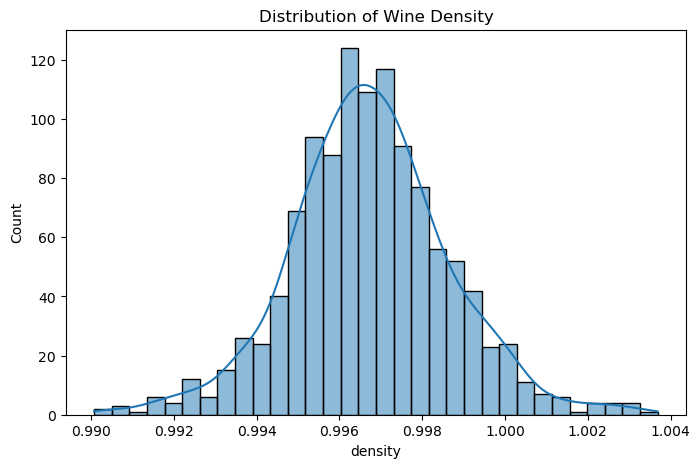

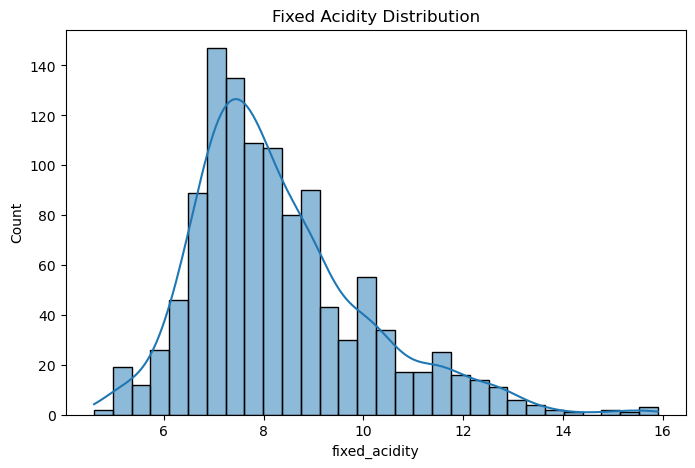

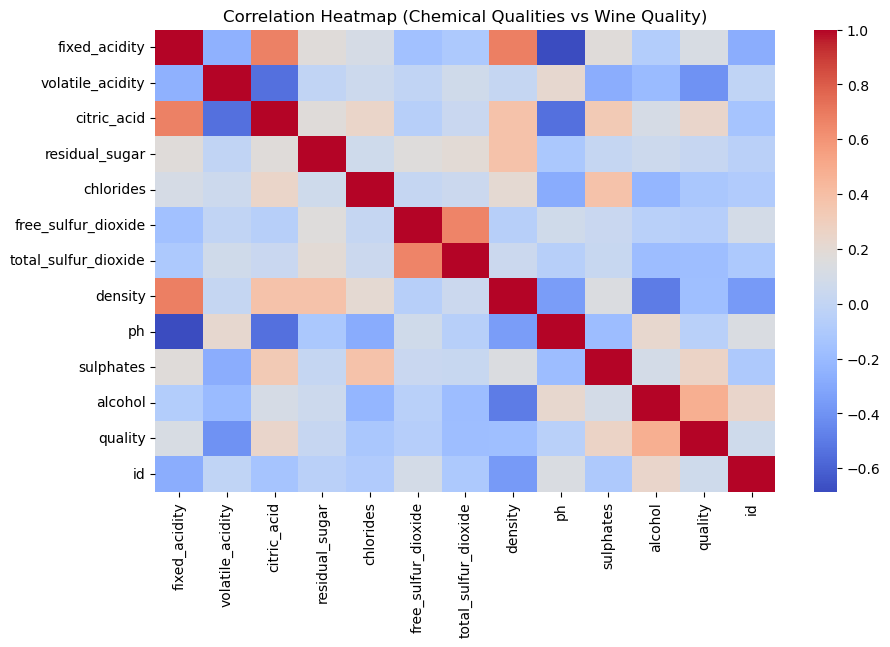

In [4]:
# Let’s do some basic visual analysis of important chemical qualities

plt.figure(figsize=(8,5))
sns.histplot(df['density'], kde=True)
plt.title("Distribution of Wine Density")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['fixed_acidity'], kde=True)
plt.title("Fixed Acidity Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Chemical Qualities vs Wine Quality)")
plt.show()


In [5]:
# Separating features and target
X = df.drop("quality", axis=1)
y = df["quality"]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Scaling is important for SVC & SGD
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# A small helper function so I don’t repeat code for every model

def evaluate(model, name):
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    
    print(f"\n{name} Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(classification_report(y_test, preds))


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
rf = RandomForestClassifier(class_weight="balanced")
evaluate(rf, "Random Forest Classifier")



Random Forest Classifier Accuracy: 0.6923
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.71      0.83      0.76       121
           6       0.67      0.67      0.67       116
           7       0.70      0.53      0.60        36
           8       1.00      0.25      0.40         4

    accuracy                           0.69       286
   macro avg       0.51      0.38      0.41       286
weighted avg       0.67      0.69      0.68       286



In [9]:
sgd = SGDClassifier(class_weight='balanced')
evaluate(sgd, "SGD Classifier")



SGD Classifier Accuracy: 0.4231
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.38      0.13         8
           5       0.73      0.48      0.58       121
           6       0.55      0.36      0.44       116
           7       0.26      0.42      0.32        36
           8       0.10      0.75      0.18         4

    accuracy                           0.42       286
   macro avg       0.29      0.40      0.28       286
weighted avg       0.57      0.42      0.47       286



In [10]:
svc = SVC(class_weight='balanced')
evaluate(svc, "Support Vector Classifier")





Support Vector Classifier Accuracy: 0.5350
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.13      0.38      0.19         8
           5       0.70      0.73      0.72       121
           6       0.66      0.35      0.46       116
           7       0.36      0.53      0.43        36
           8       0.10      0.50      0.16         4

    accuracy                           0.53       286
   macro avg       0.32      0.41      0.33       286
weighted avg       0.62      0.53      0.55       286



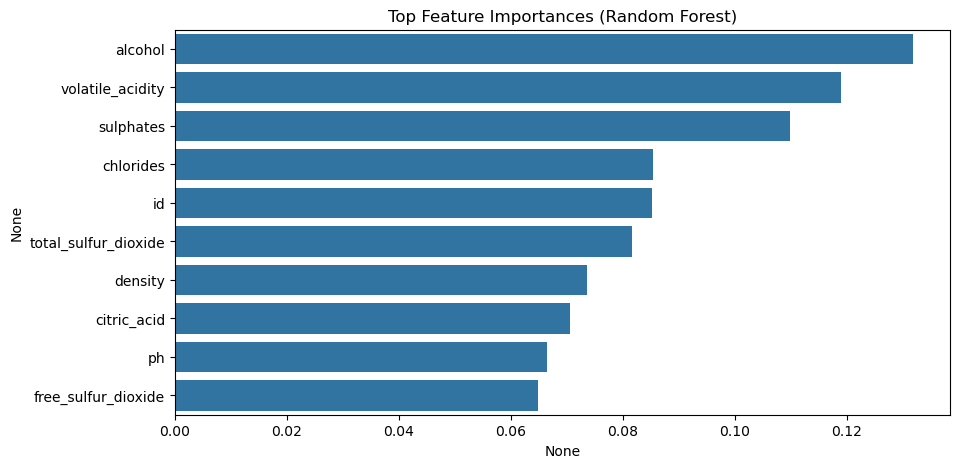

In [11]:
# Checking which chemical properties matter the most

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top Feature Importances (Random Forest)")
plt.show()
